## *Libraries*

In [10]:
# Libraries
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## *Load the model and true labels of data*

In [11]:
# Load the model saved in the native Keras format
# change the model_path with the specific directory you store the model with name M1_digit_rec.keras
model_path = 'C:/Users/sebas/Documents/Projects/DataScience and AI/NN for digit recognition main/M2_digit_rec.keras'
model = tf.keras.models.load_model(model_path)

# The true labels of each sample in Digit example folders, 
# IF YOU USE ANOTHER SET OF SAMPLES THEN CHANGE THEM TO THE TRUE LABELS OF YOUR DATA
y_true = [8, 9, 1, 3, 2, 4, 5, 6, 8, 3, 2, 1, 4, 6, 0, 5, 1, 5, 3, 2, 4, 2, 8, 3, 6, 3, 4, 8, 0, 3]

## *Prove the model with the handwritten digits*

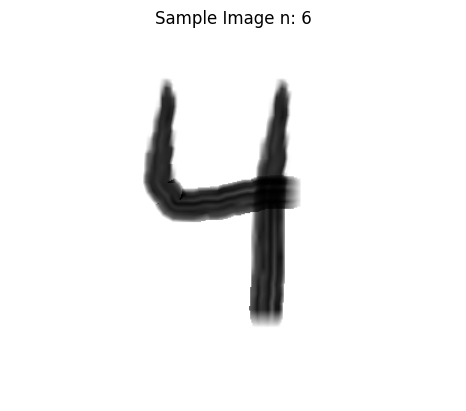

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
prediction of the model:  4


In [12]:
# Number of the image you want to test in the Digit captures folder
num = 6

# Assuming you have downloaded the Digit example folder from the repository
img = cv2.imread(f"Digit example/{num}.png")[:,:,0]

# Plot the image
plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.axis('off')  # Turn off axis labels
plt.title(f'Sample Image n: {num}')  # Add a title to the plot
plt.show()  # Display the plot

# Read the image, preprocess it, and normalize
img = cv2.resize(img, (28, 28))
img = np.invert(np.array([img]))
img = tf.keras.utils.normalize(img, axis=1)

# Predict class probabilities for the sample using the provided model
prediction = model.predict(img)
yhat = np.argmax(prediction, axis = 1)
print('prediction of the model: ', yhat[0])

## *Compare with all the handwritten digits*

If you intend to use your own samples, ensure to adjust the directory path in line 12 of the following function to point to the folder containing your samples. Enumerate the samples from 1 to n, and remember to update the 'y_true' variable in the 'Load the model and true labels of data' section with the correct labels corresponding to each sample.

In [13]:
def prediction_accuracy(model, y_true):

    # List to save the predictions made by the model
    predictions = []

    # Get the number of samples to test
    samples_length = len(y_true)

    # Loop through each sample
    for i in range(samples_length):
        # Read the image, preprocess it, and normalize
        img = cv2.imread(f"Digit example/{i+1}.png")[:, :, 0]
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        img = tf.keras.utils.normalize(img, axis=1)

        # Predict class probabilities for the sample using the provided model
        prediction_i = model.predict(img) 

        # Get the predicted class label
        yhat = np.argmax(prediction_i, axis=1)

        # Append the predicted label to the list of predictions
        predictions.append(yhat)

    # Initialize counter for correct predictions
    predicted = 0

    # Loop through each sample and compare predicted labels with true labels
    for i in range(samples_length):
        if predictions[i] == y_true[i]:  # Check if the prediction matches the true label
            predicted += 1  # Increment the counter for correct predictions
        else:
            # Print the error when prediction doesn't match the true label
            print(f"Error in sample number {i+1}:  predicted label: {predictions[i]}  |  expected label: {y_true[i]}")

    return predicted  # Return the number of correct predictions

In [14]:
accuracy_m = prediction_accuracy(model, y_true)
accuracy = accuracy_m / len(y_true)

print("\naccuracy of the model in ramdom samples: ")
print(f"{accuracy * 100:.2f}%") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━